# 👕 Cloth Detection - YOLOv8 Training

**Simple & Clean Training Pipeline**

- Dataset: `cloth-ng0sa` from Roboflow (4,609 images, 8 classes)
- Model: YOLOv8n (default settings)
- Epochs: 100

---

## 1️⃣ Setup Environment

In [1]:
# Check GPU
!nvidia-smi

Fri Jan  2 11:21:27 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Install dependencies
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 98.4 MB/s eta 0:00:00


In [3]:
# Imports
from ultralytics import YOLO
from roboflow import Roboflow
import os

print("✅ Setup complete!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Setup complete!


## 2️⃣ Download Dataset

In [4]:
# Download dataset from Roboflow
rf = Roboflow(api_key="URfs4rOSv00voq2ihyUa")
project = rf.workspace("computer-vision-m1xzb").project("cloth-ng0sa")
version = project.version(1)
dataset = version.download("yolov8")

print(f"\n📁 Dataset downloaded to: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cloth-1 in yolov8:: 100%|██████████| 9230/9230 [00:03<00:00, 2322.09it/s]


📁 Dataset downloaded to: /content/cloth-1


In [5]:
# Check dataset structure
!ls -la {dataset.location}
print("\n📋 data.yaml contents:")
!cat {dataset.location}/data.yaml

total 32
drwxr-xr-x 5 root root 4096 Jan  2 11:22 .
drwxr-xr-x 1 root root 4096 Jan  2 11:21 ..
-rw-r--r-- 1 root root  329 Jan  2 11:22 data.yaml
-rw-r--r-- 1 root root  141 Jan  2 11:22 README.dataset.txt
-rw-r--r-- 1 root root 1337 Jan  2 11:22 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Jan  2 11:22 test
drwxr-xr-x 4 root root 4096 Jan  2 11:22 train
drwxr-xr-x 4 root root 4096 Jan  2 11:22 valid

📋 data.yaml contents:
names:
- Tshirt
- dress
- jacket
- pants
- shirt
- short
- skirt
- sweater
nc: 8
roboflow:
  license: CC BY 4.0
  project: cloth-ng0sa
  url: https://universe.roboflow.com/computer-vision-m1xzb/cloth-ng0sa/dataset/1
  version: 1
  workspace: computer-vision-m1xzb
test: ../test/images
train: ../train/images
val: ../valid/images


## 3️⃣ Train Model

**Default YOLOv8n settings + 100 epochs**

In [6]:
# Initialize model
model = YOLO('yolov8n.pt')

# Train with default settings
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=100,
    imgsz=640,
    project="cloth_detection",
    name="train"
)

Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cloth-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

## 4️⃣ Evaluate Model

In [7]:
# Validate on test set
best_model = YOLO('cloth_detection/train/weights/best.pt')
metrics = best_model.val()

print("\n📊 Results:")
print(f"   mAP50: {metrics.box.map50:.4f}")
print(f"   mAP50-95: {metrics.box.map:.4f}")

Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1353.2±476.1 MB/s, size: 49.3 KB)
val: Scanning /content/cloth-1/valid/labels.cache... 254 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 254/254 455.3Kit/s 0.0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 447. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 3.9it/s 4.1s
                   all        254        447       0.75      0.823      0.835      0.648
                Tshirt         61         76      0.647      0.842      0.799      0.663
                 dress         53         62 

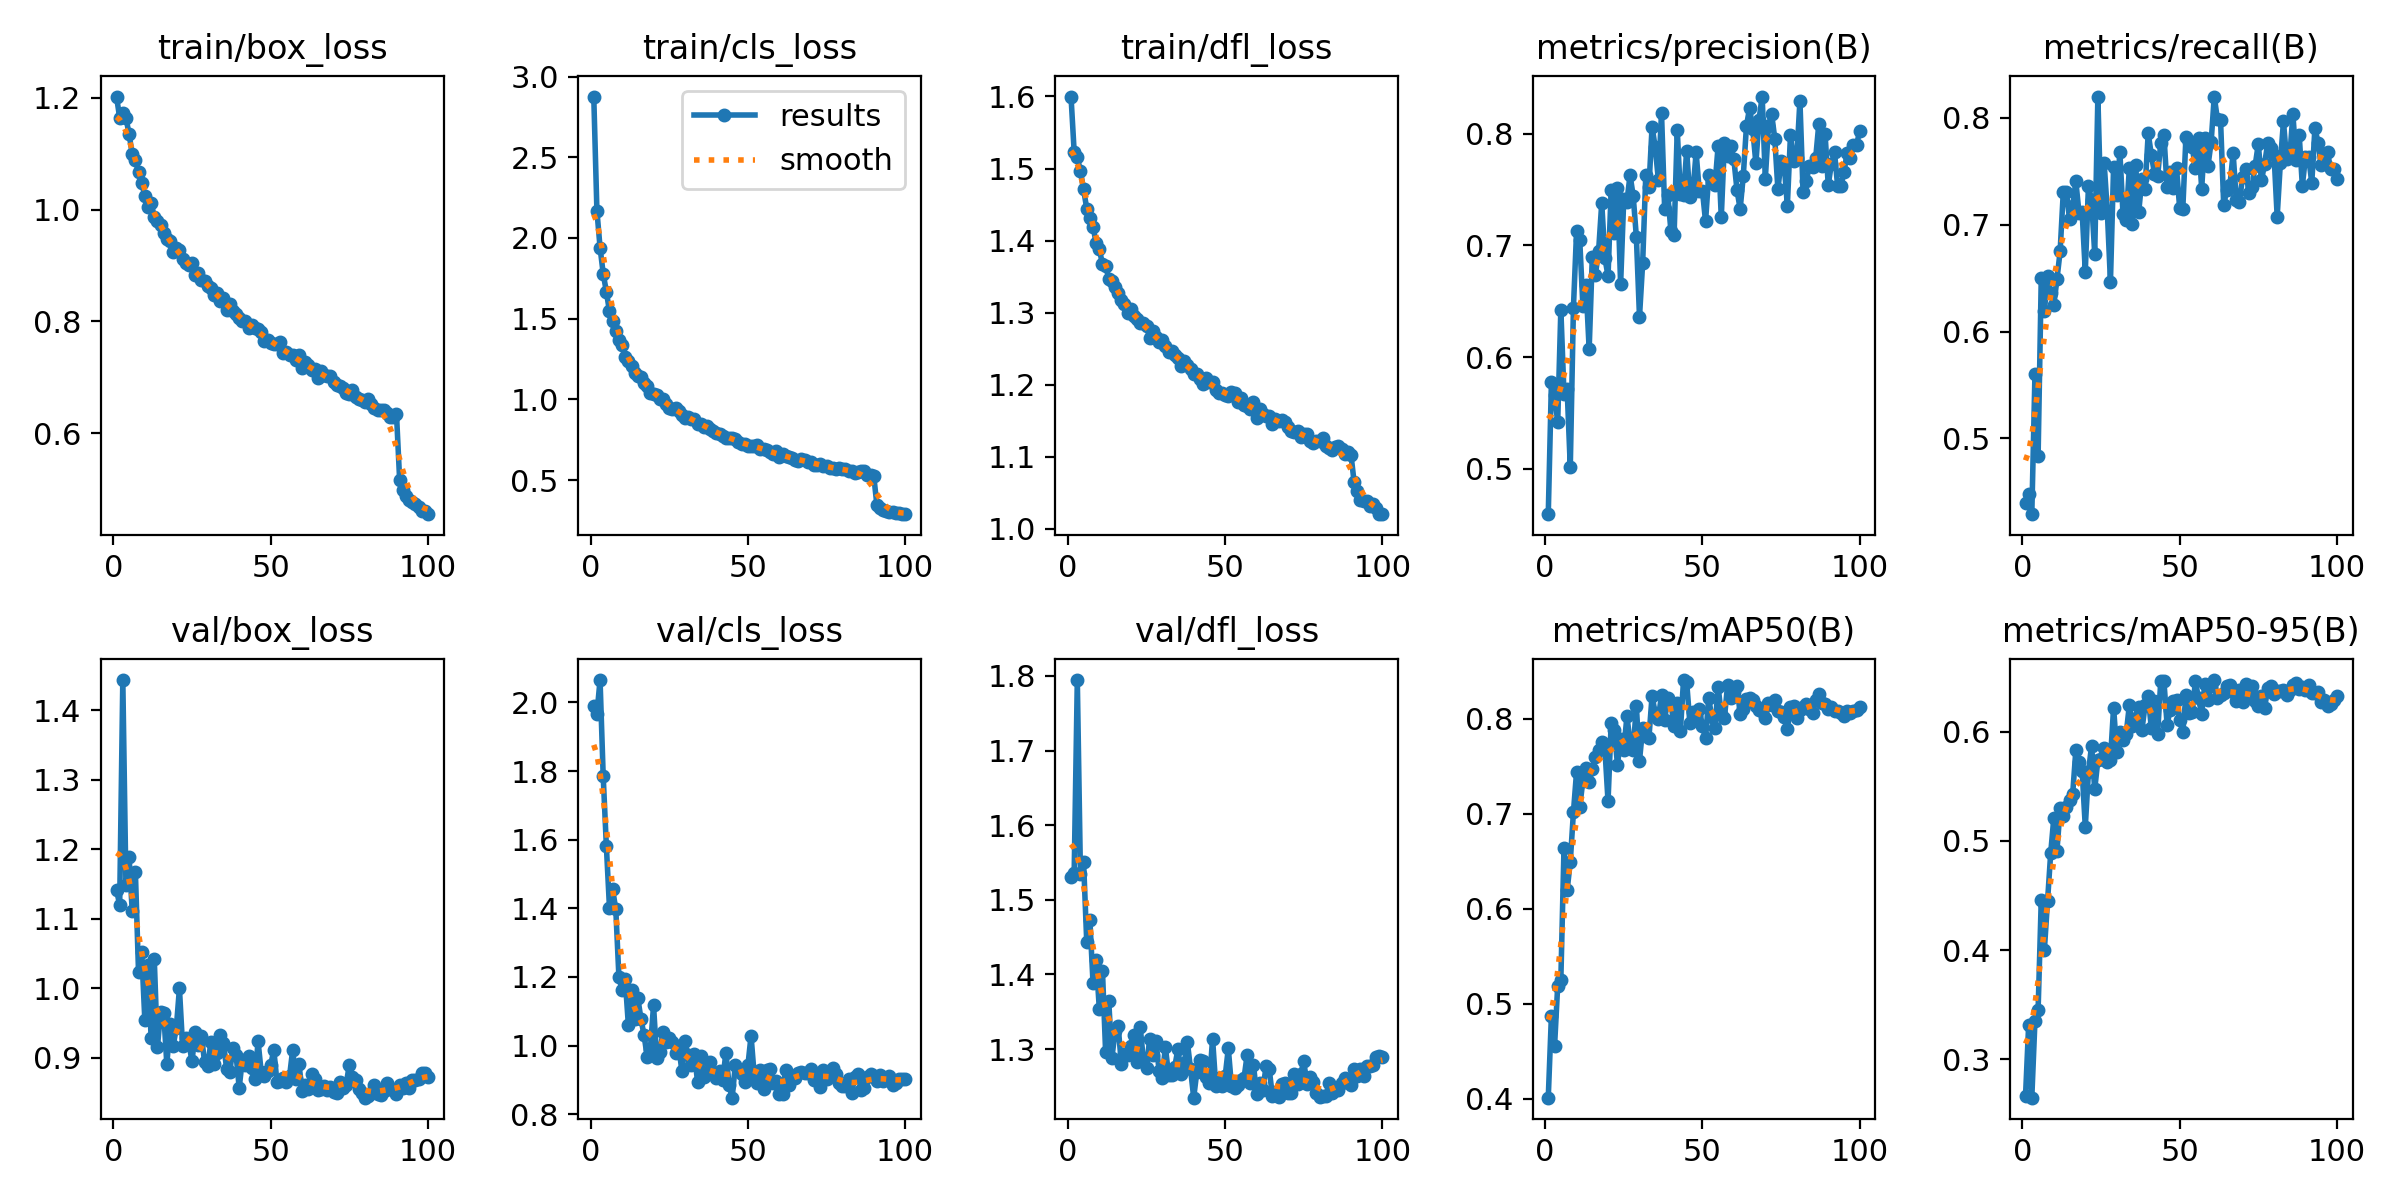

In [8]:
# Show training curves
from IPython.display import Image, display

display(Image(filename='cloth_detection/train/results.png', width=800))

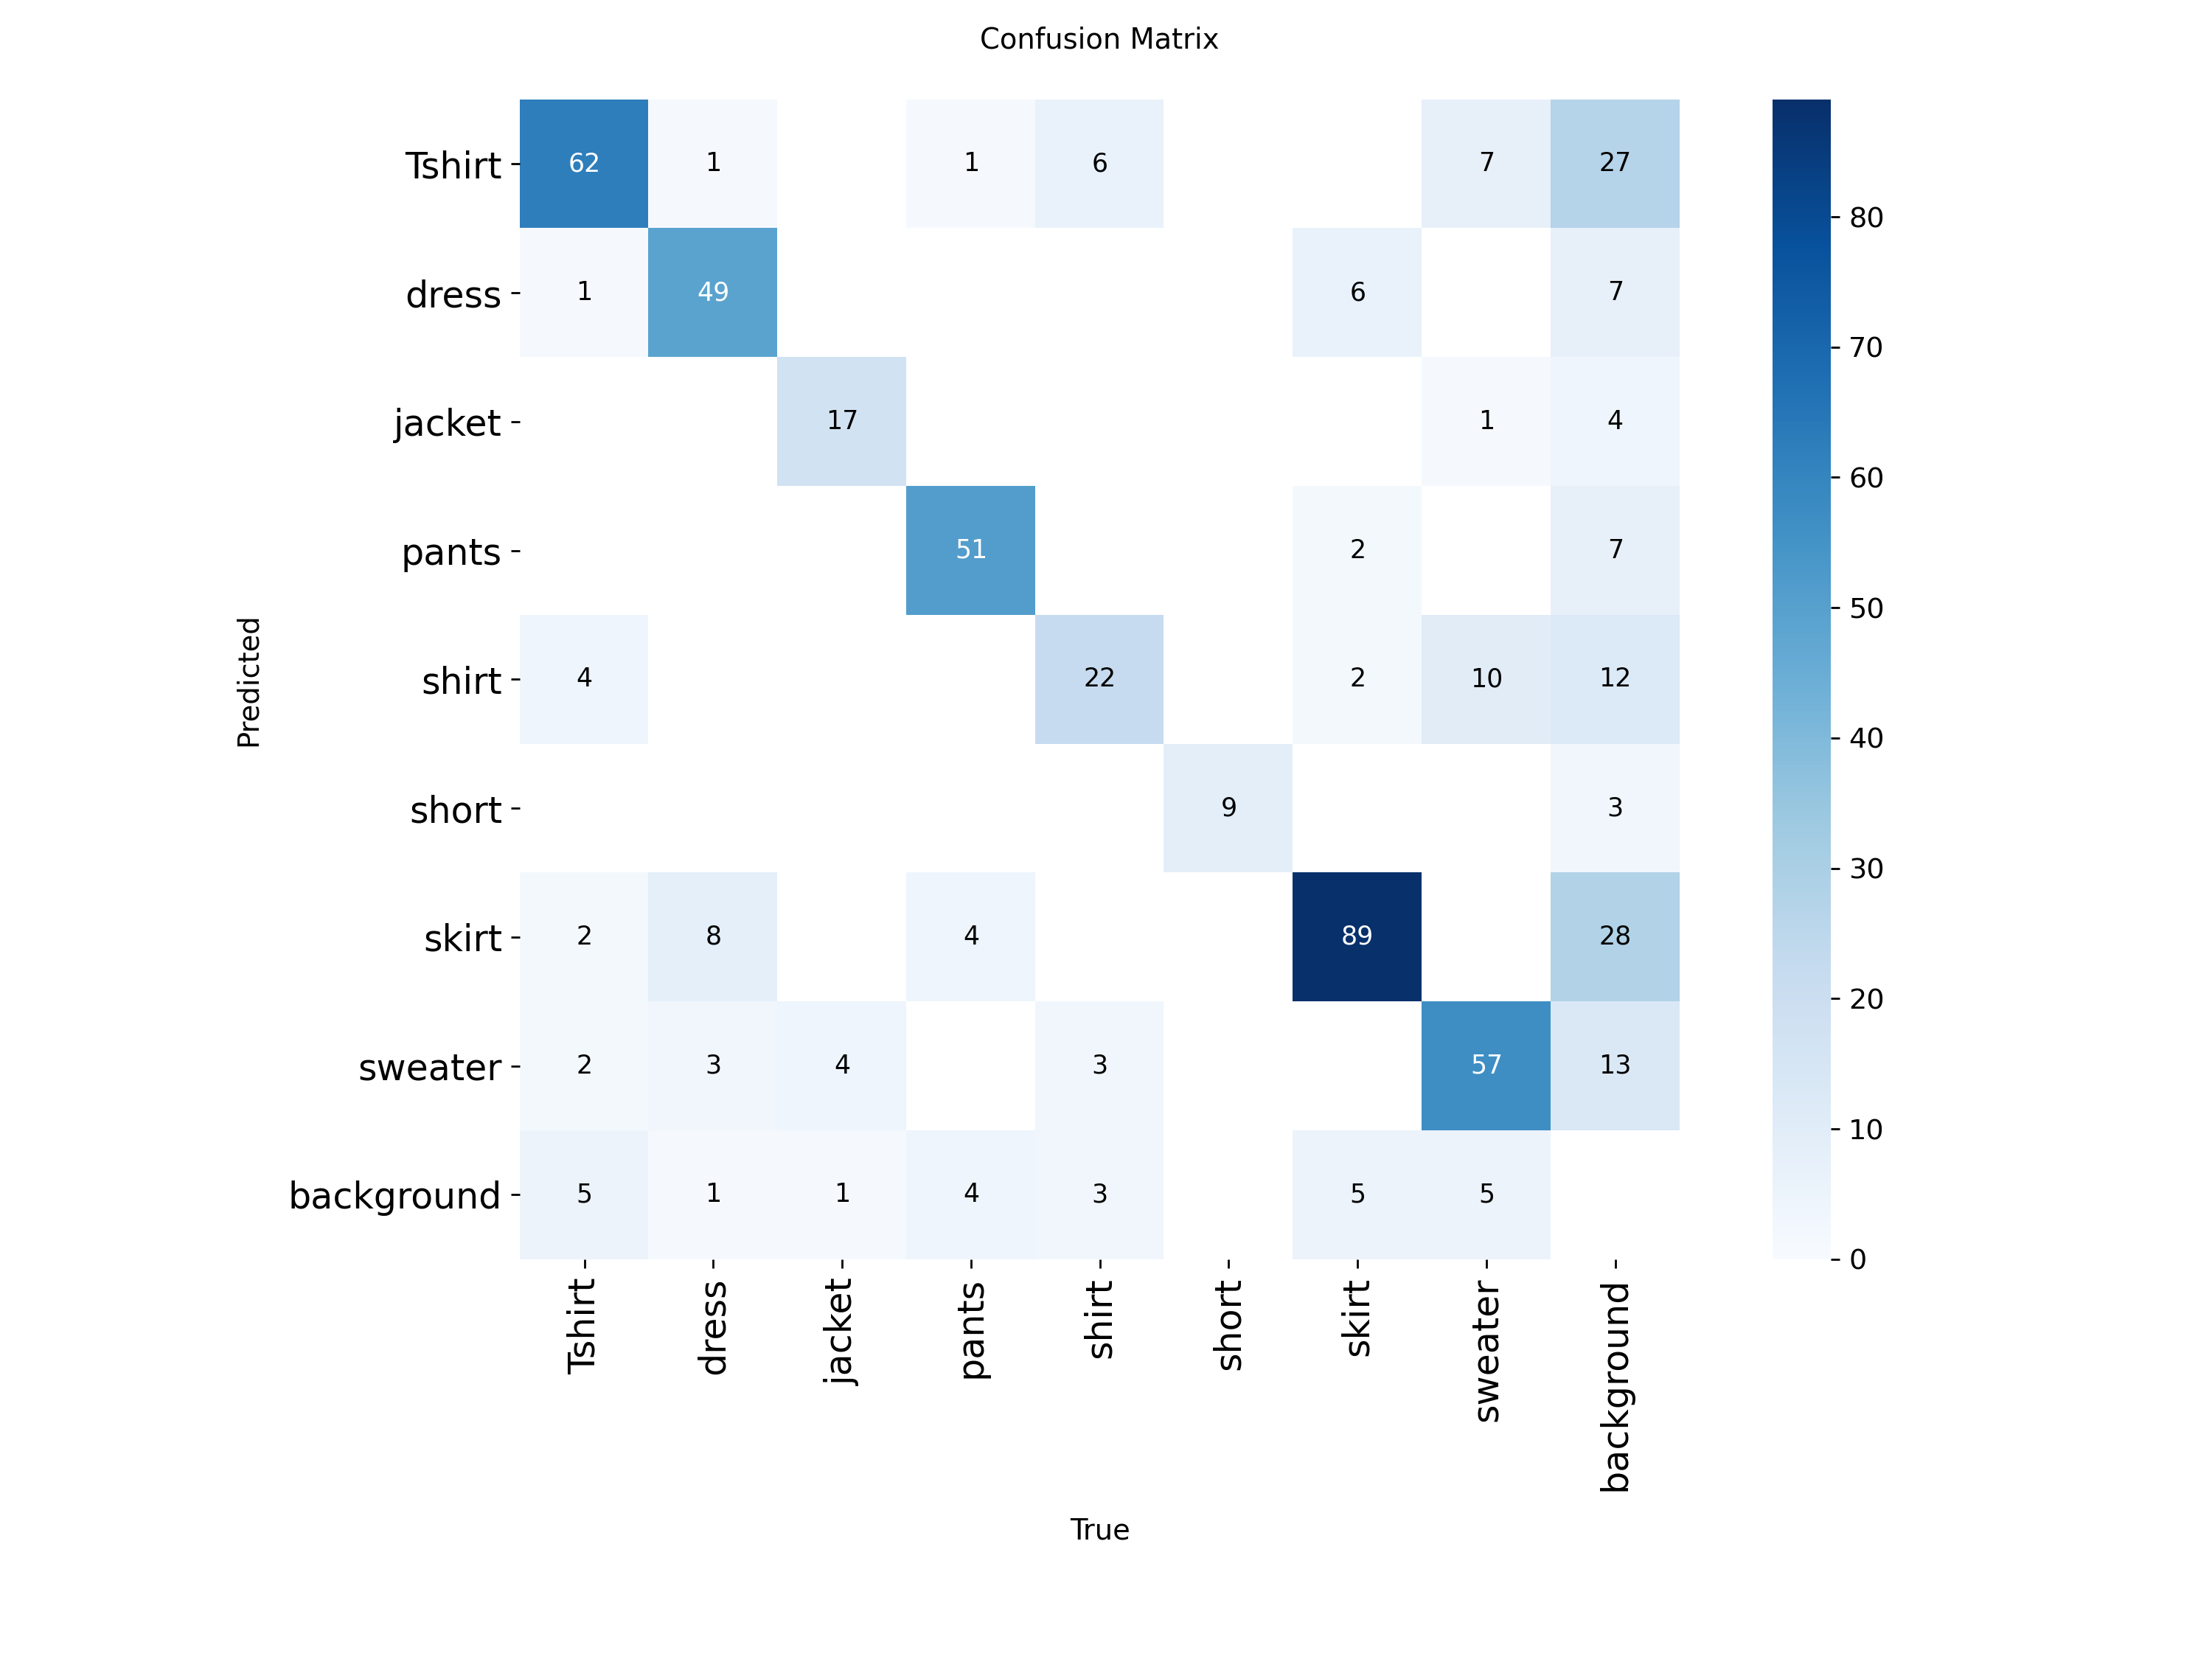

In [9]:
# Show confusion matrix
display(Image(filename='cloth_detection/train/confusion_matrix.png', width=600))

## 5️⃣ Test Inference


0: 640x640 1 dress, 8.2ms
1: 640x640 2 dresss, 8.2ms
2: 640x640 1 dress, 8.2ms
3: 640x640 1 skirt, 1 sweater, 8.2ms
4: 640x640 1 pants, 1 sweater, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/cloth_detection/predictions

🖼️ Prediction 1:


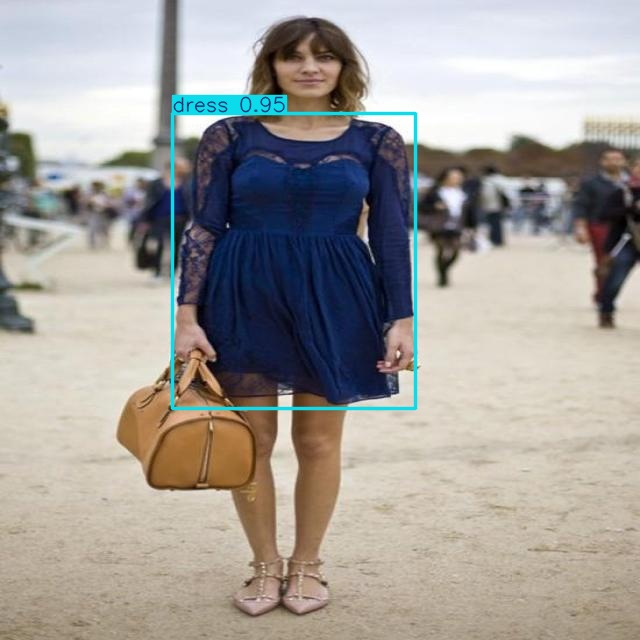


🖼️ Prediction 2:


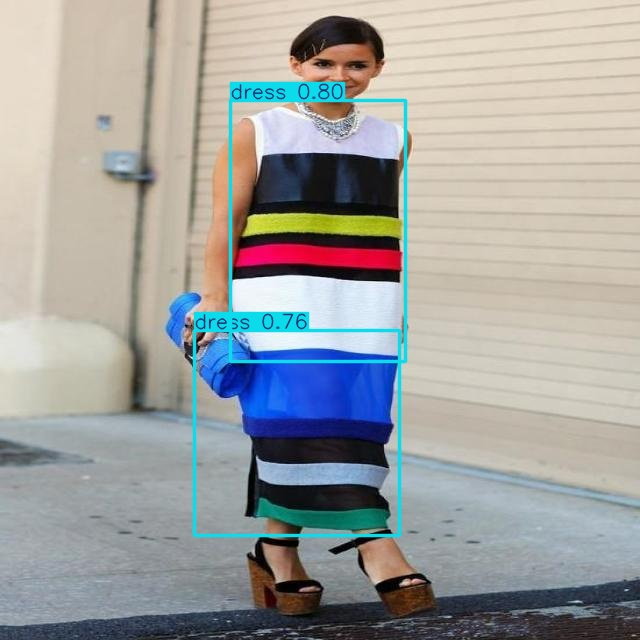


🖼️ Prediction 3:


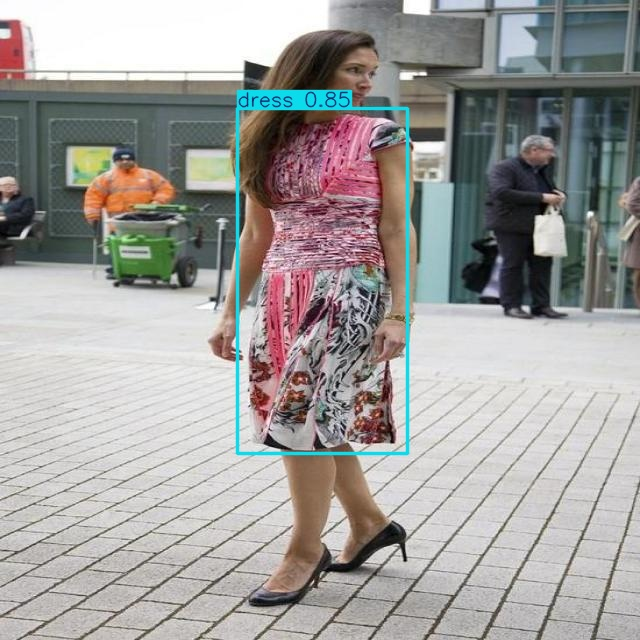


🖼️ Prediction 4:


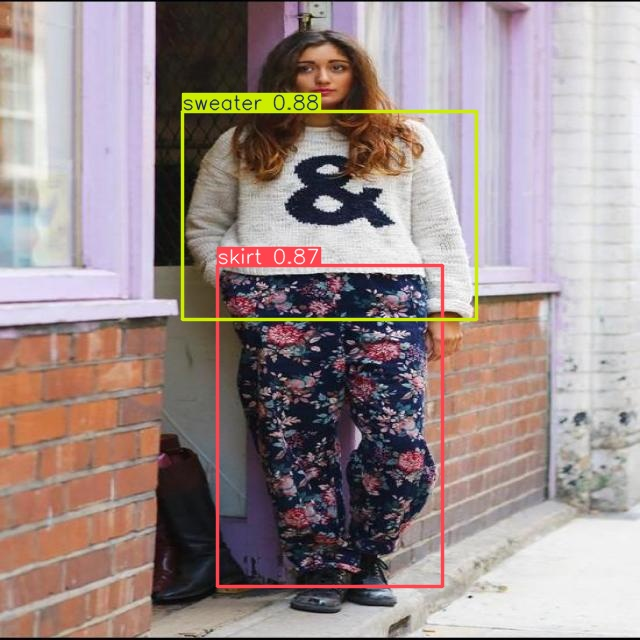


🖼️ Prediction 5:


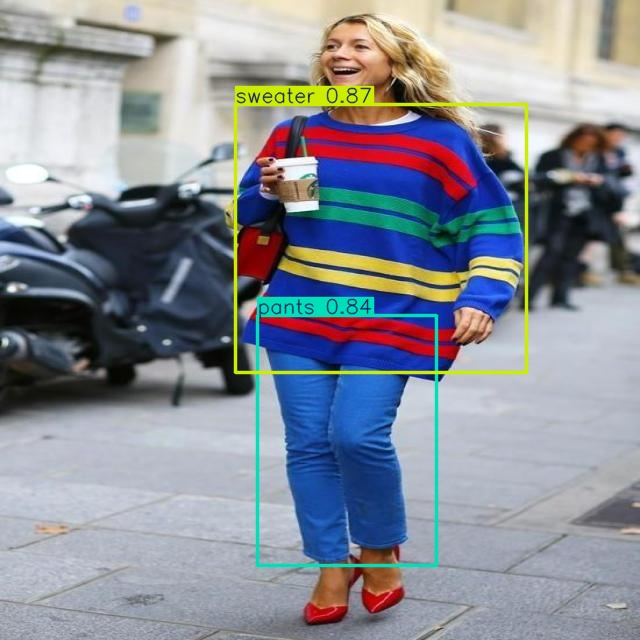

In [10]:
# Run inference on test images
import glob

test_images = glob.glob(f"{dataset.location}/test/images/*.jpg")[:5]
results = best_model.predict(test_images, save=True, project="cloth_detection", name="predictions")

# Display predictions
for i, img_path in enumerate(glob.glob("cloth_detection/predictions/*.jpg")[:5]):
    print(f"\n🖼️ Prediction {i+1}:")
    display(Image(filename=img_path, width=400))

## 6️⃣ Export & Download Model

In [11]:
# Copy best model to easy location
!cp cloth_detection/train/weights/best.pt ./best.pt
print("✅ Model saved as: best.pt")
print("\n📥 Download this file and place it in your project's 'models/' folder")

✅ Model saved as: best.pt

📥 Download this file and place it in your project's 'models/' folder


In [12]:
# Download from Colab
try:
    from google.colab import files
    files.download('best.pt')
except:
    print("Not in Colab - manually download best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

## ✅ Done!

**Classes (8):**
- Tshirt, dress, jacket, pants
- shirt, short, skirt, sweater

**Next Steps:**
1. Download `best.pt`
2. Place in `models/` folder
3. Upload to Hugging Face Space